In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
#Import dataset
dataset = pd.read_csv('Pengunjung_mall.csv')
dataset.head()

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40


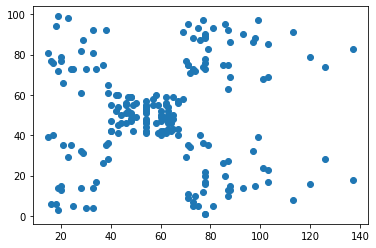

In [60]:
#Array untuk data pendapatan dan pengeluaran
X = dataset.iloc[:, [3,4]].values
#X.head()

plt.scatter(dataset.iloc[:,3], dataset.iloc[:,4])

Text(0, 0.5, 'WCSS')

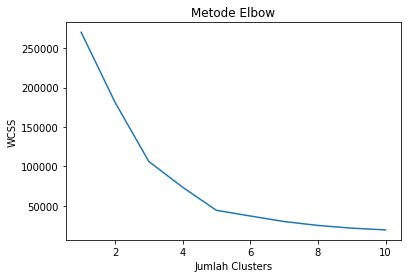

In [57]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')

#Dari metode elbow maka nilai k yang dapat kita gunakan adalah k=5


In [58]:
#melakukan clustering khusus untuk k = 5 dengan dataset pengunjung mall
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

Text(0, 0.5, 'Rating Pengeluaran (1-100')

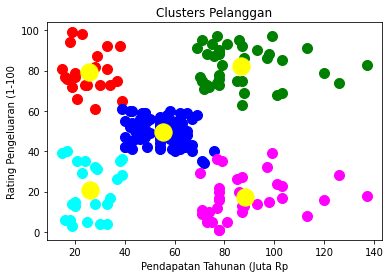

In [63]:
#visualisasi hasil cluster kita
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters Pelanggan')
plt.xlabel('Pendapatan Tahunan (Juta Rp)')
plt.ylabel('Rating Pengeluaran (1-100)')
#plt.legend()
